In [5]:
from scipy.signal import chirp
import numpy as np
from matplotlib import pyplot as plt
import math
import os
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
os.chdir("/Users/liutianlin/Desktop/Academics/MINDS/neuromorphic")
import matplotlib.pyplot as plot

import numpy as np
from matplotlib import pyplot as plt
import h5py
import DYNAPSETools.dynapseSpikesFitter as fitter

folderName = "/Users/liutianlin/Desktop/Academics/MINDS/neuromorphic/caer/myoutputs/thesis_output_aedat/"


plt.close('all')

trainFileList = ['classificationBias_slowClassificationRes_seqPulse','baselineBias_classificationRes_seqPulse']


      

    
    

In [10]:
pulseSig

array([0., 0., 0., ..., 0., 0., 0.])

In [11]:
u = 2* np.concatenate((np.ones([1,50])[0], np.zeros((1,285))[0])) # the input pulse


array([ 570,  571,  572, ..., 9762, 9763, 9764])

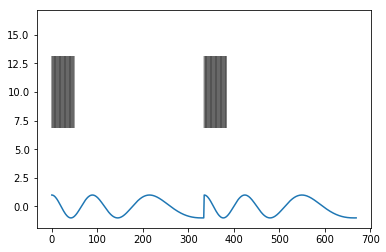

In [15]:
tEnd = 3.35
t = np.linspace(0, tEnd, 335)
w = chirp(t, f0= 1.25, f1= 0.25, t1= tEnd, method='linear') # the chirp signal
u = 2* np.concatenate((np.ones([1,50])[0], np.zeros((1,285))[0])) # the input pulse

2.852924, 0.50

repeatTime = 30
periodicChirpList = [w]
pulseSigList = [u]

for i in np.arange(repeatTime - 1):
    periodicChirpList.append(w)
    pulseSigList.append(u)

periodicChirp = np.array(periodicChirpList).flatten()    
pulseSig = np.array(pulseSigList).flatten()    

plot.eventplot(np.where(pulseSig[:2*335] == 2)[0], lineoffsets = 10, linelengths = 6.27, linewidths = 0.4, color = 'k')     


plt.plot(periodicChirp[:2*335])
# plt.plot(pulseSig[:2*335])


In [16]:
prediction_dict = {}
mse_dict = {}

for this_trainFile in trainFileList:


    trainDataset = this_trainFile + '.hdf5'
    testDataset = trainDataset

    fileName = os.path.join(folderName, trainDataset)
    h5f = h5py.File(fileName, "r")
    importedData = h5f["data"][:]
    h5f.close()

    data = np.concatenate(importedData, axis = 1)


    data = data[:, :len(periodicChirp)] # match the size of input and target 

    nonzeroNeuronIndices = np.where(np.sum(data, axis = 1) > 1e-10)[0] 
    data = data[nonzeroNeuronIndices, :]


    target = periodicChirp

    
    regr = linear_model.Ridge(alpha = 0) # carry out linear regression

    regr.fit(data.T, target.T)
    coefficients = regr.coef_

    prediction = fitter.sklearn_prevision(regr = regr, matrix = data)

    
    prediction_dict[this_trainFile] = prediction

    mse_dict[this_trainFile] = round(mean_squared_error(prediction_dict[this_trainFile], target),2)

    

In [17]:
mse_dict

{'classificationBias_slowClassificationRes_seqPulse': 0.14,
 'baselineBias_classificationRes_seqPulse': 0.42}

# Visualize results

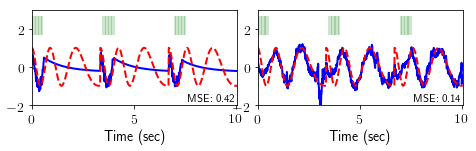

In [46]:
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

# plt.rcParams.update({'font.size': 22})
width = 6.37
height = width / 1.618 / 2
fig = plt.figure()
# fig.subplots_adjust(left=.06, bottom=.16, right=.99, top=.97)
ax1 = fig.add_subplot(121)

nrPeriods = 3


ax1.plot(np.arange(nrPeriods * 335)/100, prediction_dict['baselineBias_classificationRes_seqPulse'][0:nrPeriods * 335], color = 'b',linewidth = 2)
ax1.plot(np.arange(nrPeriods * 335)/100, target[:nrPeriods * 335], linestyle = '--', color = 'red', linewidth = 2)
# ax1.plot(np.arange(nrPeriods * 335)/100, pulseSig[:nrPeriods * 335], linestyle = '-', color = 'g', linewidth = 2)
# ax1.eventplot(np.where(pulseSig[:nrPeriods*335] == 2)[0]/100, lineoffsets = 2.2, linelengths = 1, linewidths = 0.4, color = 'k')     



inputSpikes = np.array([])

for i in np.arange(nrPeriods):
    inputSpikes = np.concatenate((inputSpikes, np.linspace(0, 0.5, 8) + i * 3.5 ))

ax1.eventplot(inputSpikes, lineoffsets = 2.2, linelengths = 1, linewidths = 0.4, color = 'g')     



ax1.set_ylim([-2, 3])
ax1.set_xlim([0, 10.05])
ax1.set_xlabel('Time (sec)')
ax1.text(7.65, -1.8, 'MSE: ' + str(mse_dict['baselineBias_classificationRes_seqPulse']), fontsize=11)

# ax1.set_ylabel('Time (sec)')


ax2 = fig.add_subplot(122)
ax2.plot(np.arange(nrPeriods * 335)/100, prediction_dict['classificationBias_slowClassificationRes_seqPulse'][:nrPeriods * 335], color = 'b', linewidth = 2)
ax2.plot(np.arange(nrPeriods * 335)/100, target[:nrPeriods * 335], linestyle = '--', color = 'red',  linewidth = 2)
# ax2.plot(np.arange(nrPeriods * 335)/100, pulseSig[:nrPeriods * 335], linestyle = '-', color = 'g', linewidth = 2)
# ax2.eventplot(np.where(pulseSig[:nrPeriods*335] == 2)[0]/100, lineoffsets = 2.2, linelengths = 1, linewidths = 0.4, color = 'k')     
ax2.eventplot(inputSpikes, lineoffsets = 2.2, linelengths = 1, linewidths = 0.4, color = 'g')     

ax2.set_ylim([-2, 3])
ax2.set_xlim([0, 10.05])
ax2.text(7.65, -1.8, 'MSE: ' + str(mse_dict['classificationBias_slowClassificationRes_seqPulse']), fontsize=11)

ax2.set_xlabel('Time (sec)')


fig.set_size_inches(width, height)
fig.subplots_adjust(left=.04, bottom=.05, right=.98, top=.97)

plt.subplots_adjust(bottom = 0.3, wspace=0.1)
plt.gcf().savefig('/Users/liutianlin/Desktop/Academics/MSc_thesis/my_msc_thesis/figs/thesis_regression.pdf', dpi=1200)

plt.show()



In [111]:
round(mean_squared_error(prediction_dict['baselineBias_classificationRes_seqPulse'][0:nrPeriods * 335], target[:nrPeriods * 335]),2) 




0.41

In [110]:
round(mean_squared_error(prediction_dict['classificationBias_slowClassificationRes_seqPulse'][0:nrPeriods * 335], target[:nrPeriods * 335]),2)
                   
                   

0.19

In [30]:

inputSpikes = np.array([])

for i in np.arange(nrPeriods):
    inputSpikes = np.concatenate((inputSpikes, np.linspace(0, 0.5, 10) + i * 3.5 ))

In [31]:
inputSpikes

array([0.        , 0.05555556, 0.11111111, 0.16666667, 0.22222222,
       0.27777778, 0.33333333, 0.38888889, 0.44444444, 0.5       ,
       3.5       , 3.55555556, 3.61111111, 3.66666667, 3.72222222,
       3.77777778, 3.83333333, 3.88888889, 3.94444444, 4.        ,
       7.        , 7.05555556, 7.11111111, 7.16666667, 7.22222222,
       7.27777778, 7.33333333, 7.38888889, 7.44444444, 7.5       ])